### Import des modules nécessaires au projet

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import math
import seaborn as sns 

### Import des données

In [2]:
DATA = pd.read_csv("C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Projet_2/2016_Building_Energy_Benchmarking.csv")

### Exploration des données

In [3]:
DATA.head(50)

OSEBuildingID  DataYear          BuildingType  \
0               1      2016        NonResidential   
1               2      2016        NonResidential   
2               3      2016        NonResidential   
3               5      2016        NonResidential   
4               8      2016        NonResidential   
5               9      2016    Nonresidential COS   
6              10      2016        NonResidential   
7              11      2016        NonResidential   
8              12      2016        NonResidential   
9              13      2016  Multifamily MR (5-9)   
10             15      2016        NonResidential   
11             16      2016        NonResidential   
12             17      2016        NonResidential   
13             18      2016        NonResidential   
14             19      2016        NonResidential   
15             21      2016    Nonresidential COS   
16             22      2016        NonResidential   
17             23      2016        NonResidential   
18             24      2016        NonResidential   
19             25      2016        NonResidential   
20             26      2016        NonResidential   
21             27      2016        NonResidential   
22             28      2016     SPS-District K-12   
23             29      2016        NonResidential   
24             30      2016        NonResidential   
25             31      2016        NonResidential   
26             32      2016        NonResidential   
27             33      2016        NonResidential   
28             34      2016     SPS-District K-12   
29             35      2016        NonResidential   
30             36      2016     SPS-District K-12   
31             37      2016     SPS-District K-12   
32             38      2016        NonResidential   
33             40      2016        NonResidential   
34             41      2016        NonResidential   
35             43      2016                Campus   
36             46      2016        NonResidential   
37             50      2016     SPS-District K-12   
38             51      2016     SPS-District K-12   
39             52      2016        NonResidential   
40             53      2016        NonResidential   
41             54      2016        NonResidential   
42             55      2016        NonResidential   
43             56      2016        NonResidential   
44             57      2016        NonResidential   
45             58      2016        NonResidential   
46             59      2016        NonResidential   
47             60      2016        NonResidential   
48             62      2016        NonResidential   
49             63      2016        NonResidential   

            PrimaryPropertyType                                  PropertyName  \
0                         Hotel                          Mayflower park hotel   
1                         Hotel                               Paramount Hotel   
2                         Hotel                       5673-The Westin Seattle   
3                         Hotel                                     HOTEL MAX   
4                         Hotel                   WARWICK SEATTLE HOTEL (ID8)   
5                         Other                                 West Precinct   
6                         Hotel                                        Camlin   
7                         Other                             Paramount Theatre   
8                         Hotel                          311wh-Pioneer Square   
9          Mid-Rise Multifamily                                 Lyon Building   
10                        Hotel                          Hotel Monaco Seattle   
11                        Hotel                                5679-W Seattle   
12                        Hotel                       Executive Pacific Plaza   
13                        Hotel                    Crowne Plaza Hotel Seattle   
14                        Hotel                         Hotel Vintage Seattle   
15  

In [4]:
DATA.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

## Nettoyer les données

On nettoie dans un premier temps le jeu de données en commençant par l'ID du batiment,TaxParcelIdentificationNumber et PropertyName qui sont des variables unique à chaque batiment donc n'ont pas de valeurs prédictives .  On enlèvera également les variables de localisation pour ne garder que le quartier "Neighboorhood", qui risque d'être davantage pertinent que les autres. On enlèvera également GHGEMission Intensity car ce n'est pas une variable cible et est trop correlée à notre variable cible.
Les étapes suivantes sont d'enlever à partir de la colonne CompliantStatus toutes les valeurs qui ne sont pas 'Compliant', pour s'assurer de la qualité des données. On enlève également SiteEnergyUseWN(kBtu) qui est une de nos variables cibles mais dans une autre unité de valeurs.
Enfin, on s'assure de ne pas considérer dans le dataset depuis la colonne 'Outliers' les données aberrantes, qui seront listées autrement que NaN comme valeur.

In [5]:
# List of column names to drop
columns_to_drop = [
    'OSEBuildingID',
    'City',
    'State',
    'Address',
    'ZipCode',
    'Latitude',
    'Longitude',
    'TaxParcelIdentificationNumber',
    'PropertyName',
    'CouncilDistrictCode',
    'GHGEmissionsIntensity',
    'SiteEnergyUseWN(kBtu)',
    'DataYear'
]

# Drop the columns from the DataFrame
DATA.drop(columns=columns_to_drop, axis=1, inplace=True)

# Étape 2: Enlever toutes les lignes où la colonne 'ComplianceStatus' n'est pas 'Compliant'
DATA = DATA[DATA['ComplianceStatus'] == 'Compliant']

# Étape 3: Enlever toutes les lignes où la colonne 'Outliers' n'est pas NaN
DATA = DATA[DATA['Outlier'].isna()]

### Filtrer les données

#### Enlever les batiments non résidentiels  :

Nous sommes intéressés pour ce projet seulement aux batiments non destinés à l'habitation donc nous garderons les entrées dans notre jeu de  données ayant le building type 'NonResidential"

In [6]:
DATA['BuildingType'].value_counts()

NonResidential          1432
Multifamily LR (1-4)     985
Multifamily MR (5-9)     570
Multifamily HR (10+)     108
Nonresidential COS        81
Campus                    24
SPS-District K-12         10
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [7]:
DATA_NONRES = DATA[(DATA['BuildingType'] == 'NonResidential') | (DATA['BuildingType'] == 'Nonresidential COS') | (DATA['BuildingType'] == 'SPS-District K-12') | (DATA['BuildingType'] == 'Nonresidential WA')] 

### Feature Engineering

#### Transformer les valeurs de relevés en binaire 

Nous sommes au courant que certaines des variables de notre dataset sont directement utilisées par l'organisme créateur du projet et dataset pour calculer nos variables cibles de prédictions : colonnes_target = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']. Par principe d'éviter de garder ce projet pertinent, ces variables "évidentes" de relevés= ['Electricity(kWh)', 'Electricity(kBtu)', 'SteamUse(kBtu)', 
                        'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'NaturalGas(kBtu)','NaturalGas(therms)','SiteEnergyUseWN(kBtu)'] 
seront transformées en binaire dans ce jeu de données. L'idée est de rendre plus simple l'obtention de ces donneés là, tel que ce batiment utilise de l'éléctricité = 0, sinon 1.

In [8]:
# Les colonnes à transformer
columns_to_transform = ['Electricity(kWh)', 'Electricity(kBtu)', 'SteamUse(kBtu)', 
                        'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'NaturalGas(kBtu)','NaturalGas(therms)']

# Appliquer la transformation
DATA_NONRES[columns_to_transform] = DATA_NONRES[columns_to_transform].applymap(lambda x: "Oui" if x > 0 else "Non")

C:\Users\pdevi\AppData\Local\Temp\ipykernel_8212\1942559779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NONRES[columns_to_transform] = DATA_NONRES[columns_to_transform].applymap(lambda x: "Oui" if x > 0 else "Non")


#### Transformer la variable 'YearBuilt' en intervalles de valeurs plutôt que l'année elle-même

In [9]:
# Déterminer les bornes des intervalles
# On commence par le plus petit nombre arrondi à la dizaine inférieure et on monte par intervalles de 4 ans
min_year = DATA_NONRES['YearBuilt'].min()
max_year = DATA_NONRES['YearBuilt'].max()
bins = list(range(min_year - (min_year % 8), max_year + 8, 8))

# Créer les intervalles
DATA_NONRES['YearBuilt'] = pd.cut(DATA_NONRES['YearBuilt'], bins=bins, right=False, labels=[f"{b}-{b+7}" for b in bins[:-1]])

C:\Users\pdevi\AppData\Local\Temp\ipykernel_8212\1359540441.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NONRES['YearBuilt'] = pd.cut(DATA_NONRES['YearBuilt'], bins=bins, right=False, labels=[f"{b}-{b+7}" for b in bins[:-1]])


#### Nettoyage final : suppression des colonnes/variables à valeurs manquantes au dessus de 75%

In [10]:
# Supprimer les colonnes avec plus de 75 % de valeurs manquantes
columns_to_drop = DATA_NONRES.columns[DATA_NONRES.isnull().mean() > 0.75]
# Calculer la proportion de valeurs manquantes pour chaque variable
missing_values = DATA_NONRES.isnull().sum()/len(DATA_NONRES)
print("Valeurs manquantes par colonne:")
print(missing_values)

# Nettoyage des données d'énergie du site en supprimant les colonnes sélectionnées
DATA_NONRES = DATA_NONRES.drop(columns=columns_to_drop)

# Afficher les noms des colonnes supprimées
print("Colonnes supprimées :", columns_to_drop)


Valeurs manquantes par colonne:
BuildingType                       0.000000
PrimaryPropertyType                0.000000
Neighborhood                       0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.000000
LargestPropertyUseType             0.002625
LargestPropertyUseTypeGFA          0.002625
SecondLargestPropertyUseType       0.454724
SecondLargestPropertyUseTypeGFA    0.454724
ThirdLargestPropertyUseType        0.776247
ThirdLargestPropertyUseTypeGFA     0.776247
YearsENERGYSTARCertified           0.936352
ENERGYSTARScore                    0.349081
SiteEUI(kBtu/sf)                   0.000000
SiteEUIWN(kBtu/sf)                 0.000000
SourceEUI(kBtu/sf)                 0.000000
SourceEUIWN(kBtu/sf)               0.000000


On pourra remarquer que nos variables cibles n'ont pas de valeurs manquantes ! 

### Imputation des valeurs manquantes pour les variables prédictives

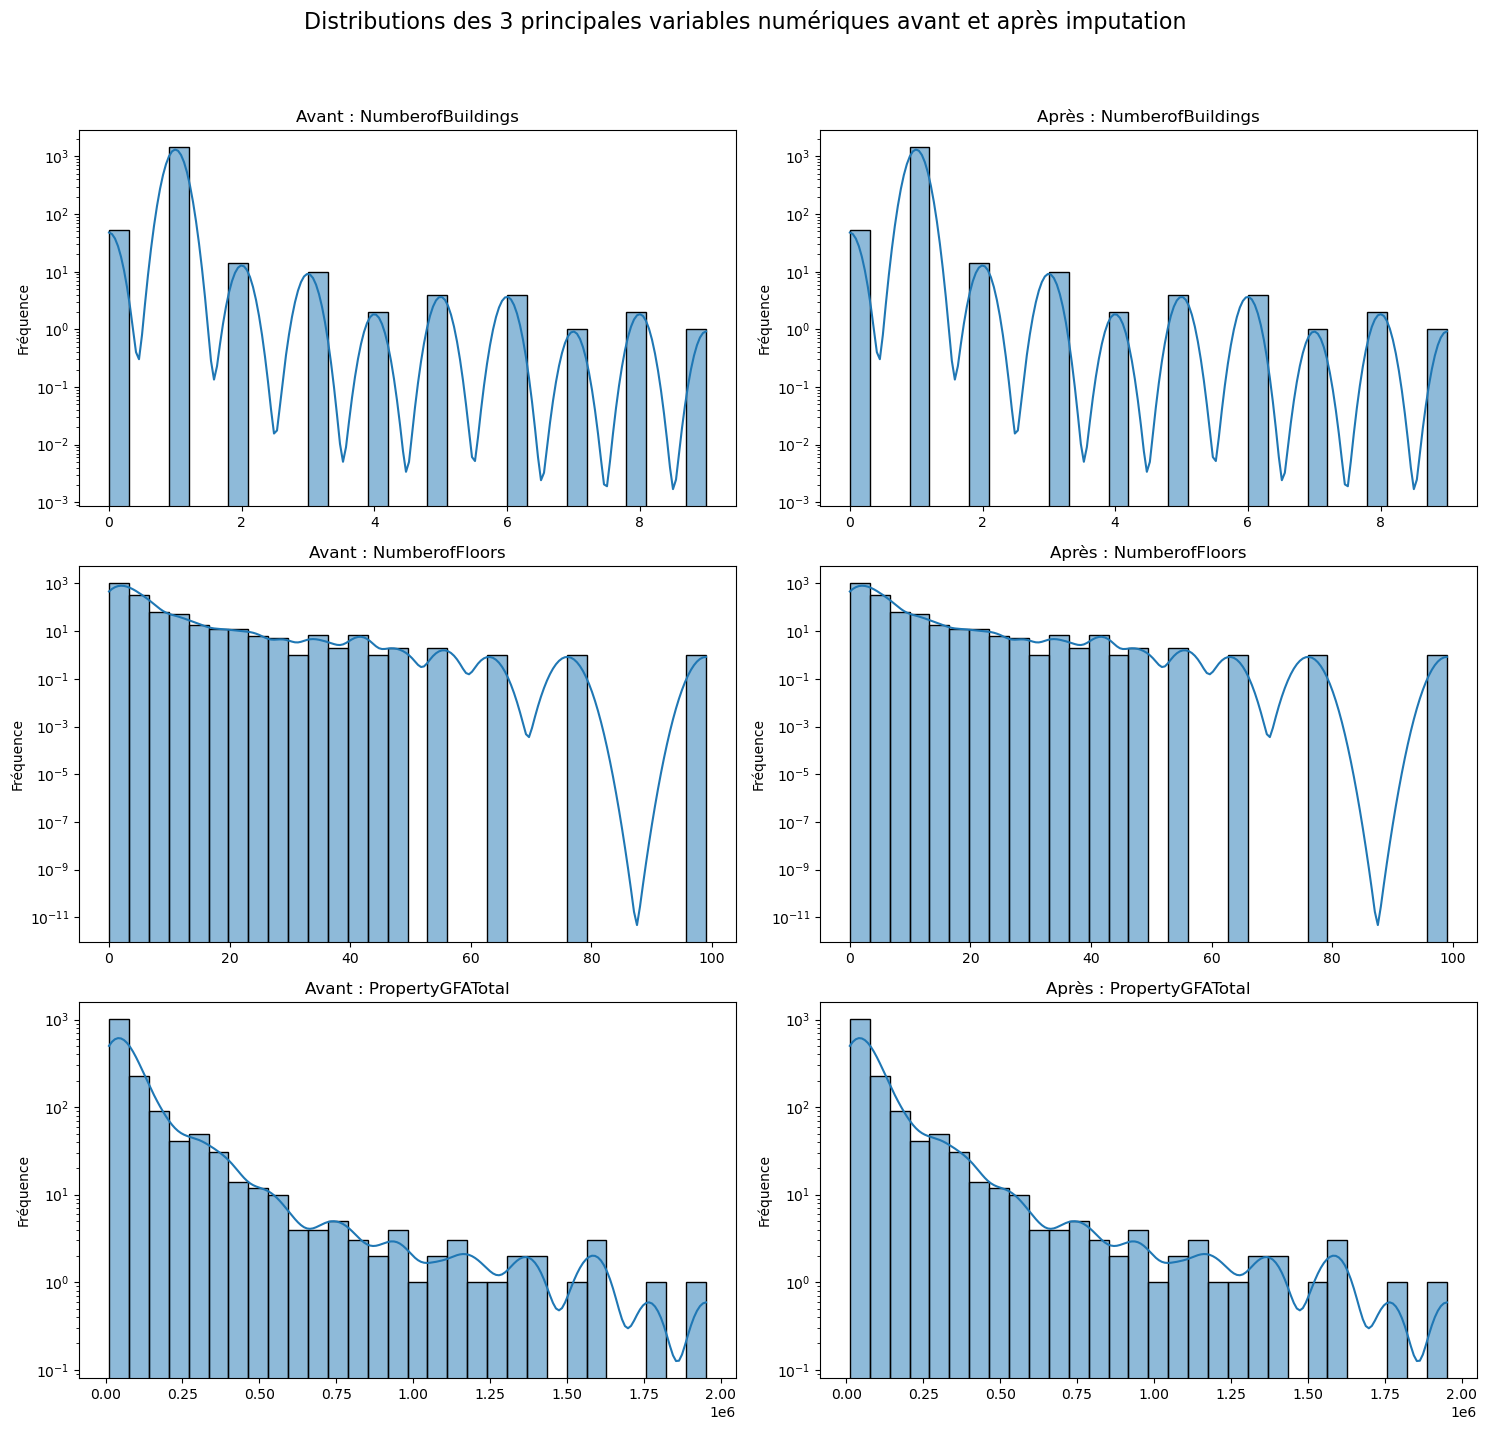

In [11]:
import seaborn as sns

# Identifier les colonnes numériques
numerical_variables = DATA_NONRES.select_dtypes(include=[np.number]).columns

# Calculer le nombre de valeurs non manquantes pour chaque variable numérique et sélectionner les 3 premières
top_3_numerical = DATA_NONRES[numerical_variables].count().nlargest(3).index.tolist()

# Imputer les valeurs manquantes pour toutes les variables numériques
for column in numerical_variables:
    median_value = DATA_NONRES[column].median()
    DATA_NONRES[column].fillna(median_value, inplace=True)
    
        

# Imputer les valeurs manquantes pour les variables catégorielles
categorical_variables = DATA_NONRES.select_dtypes(exclude=[np.number]).columns

for column in categorical_variables:
    mode_value = DATA_NONRES[column].mode()[0]
    DATA_NONRES[column].fillna(mode_value, inplace=True)

    
# Afficher les distributions avant et après l'imputation pour les 3 premières variables numériques
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Distributions des 3 principales variables numériques avant et après imputation', fontsize=16)

for i, column in enumerate(top_3_numerical):
    # Tracer avant l'imputation
    sns.histplot(DATA_NONRES[column], kde=True, bins=30, ax=axs[i, 0])
    axs[i, 0].set_title(f'Avant : {column}')
    axs[i, 0].set_xlabel('')
    axs[i, 0].set_ylabel('Fréquence')
    axs[i, 0].set_yscale('log')

    # Tracer après l'imputation
    sns.histplot(DATA_NONRES[column], kde=True, bins=30, ax=axs[i, 1])
    axs[i, 1].set_title(f'Après : {column}')
    axs[i, 1].set_xlabel('')
    axs[i, 1].set_ylabel('Fréquence')
    axs[i, 1].set_yscale('log')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Number of highly correlated pairs: 4
                Variable 1                 Variable 2  Corrélation
96      SourceEUI(kBtu/sf)       SourceEUIWN(kBtu/sf)     0.994228
25        PropertyGFATotal     PropertyGFABuilding(s)     0.978376
26        PropertyGFATotal  LargestPropertyUseTypeGFA     0.949616
48  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA     0.947607
Colonnes supprimées: ['SourceEUIWN(kBtu/sf)', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA']


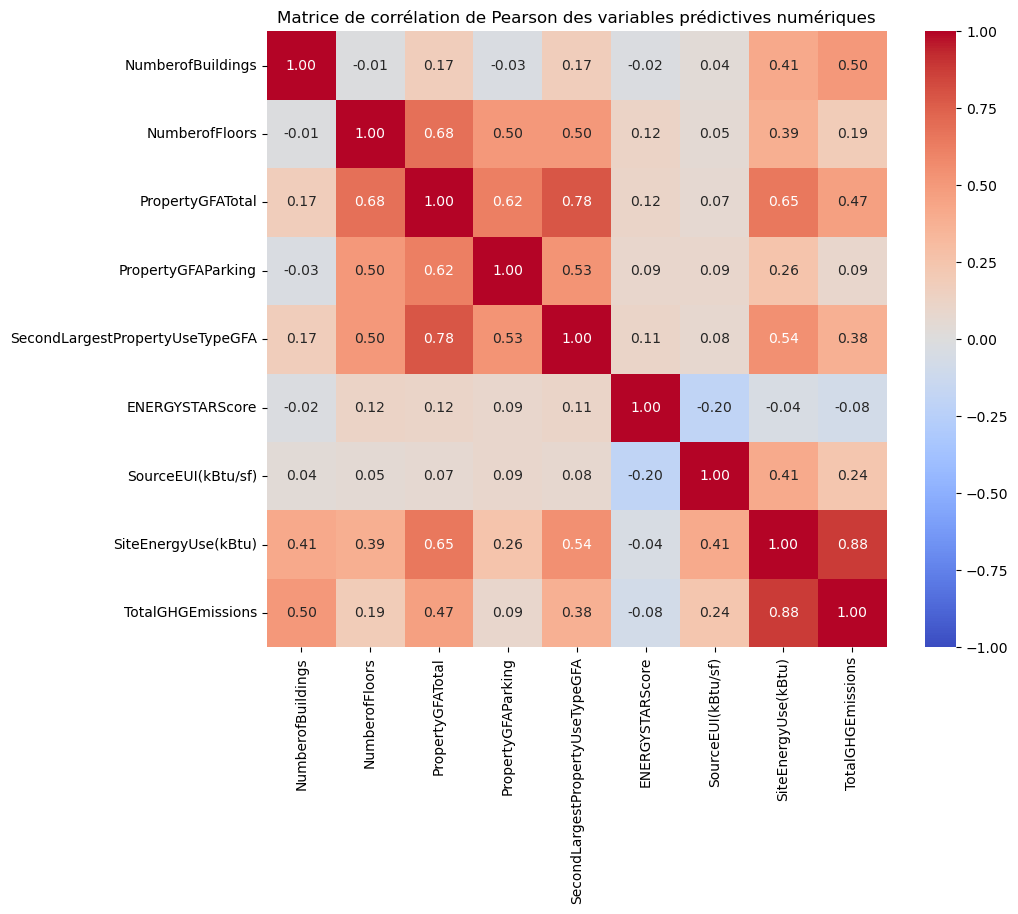

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming DATA_NONRES is loaded and initially modified as per your earlier steps

# Recalculate the Pearson correlation matrix for numerical variables
corr_matrix = DATA_NONRES.select_dtypes(include=[np.number]).corr()

# Ignore the diagonal by setting it to NaN to avoid self-correlation
np.fill_diagonal(corr_matrix.values, np.nan)

# Finding highly correlated pairs with correlation > 0.9
high_corr_pairs = corr_matrix.unstack().dropna().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Corrélation']
# Filter out the pairs where the correlation is > 0.9
high_corr_pairs = high_corr_pairs[high_corr_pairs['Corrélation'] > 0.9]

# Ensure only unique pairs by removing symmetric duplicates
high_corr_pairs['sorted_row'] = high_corr_pairs.apply(lambda row: '_'.join(sorted([row['Variable 1'], row['Variable 2']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['sorted_row']).drop('sorted_row', axis=1)

# Sorting by correlation to display the most correlated pairs first
high_corr_pairs.sort_values(by='Corrélation', ascending=False, inplace=True)

# Print the number of highly correlated pairs
print("Number of highly correlated pairs:", len(high_corr_pairs))

# Display the pairs
print(high_corr_pairs)
removed_columns = []

# Remove the column with fewer non-null values for each pair that meets the criteria
for i, row in high_corr_pairs.iterrows():
    var1, var2 = row['Variable 1'], row['Variable 2']
    # Ensure both columns exist before comparing
    if var1 in DATA_NONRES.columns and var2 in DATA_NONRES.columns:
        if DATA_NONRES[var1].count() < DATA_NONRES[var2].count():
            DATA_NONRES.drop(var1, axis=1, inplace=True)
            removed_columns.append(var1)
        else:
            DATA_NONRES.drop(var2, axis=1, inplace=True)
            removed_columns.append(var2)

# Print the removed columns
print("Colonnes supprimées:", removed_columns)

# Recalculate the correlation matrix to check the result after removals
corr_matrix = DATA_NONRES.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation de Pearson des variables prédictives numériques')
plt.show()


On peut observer qu'il y a beaucoup de variables donc, qui sont redondantes en information entre elles, donc par souci de garder un jeu de données simplifié pour les algorithmes à suivre et donc de ne pas d'avoir trop de variables avec lesquelles travailler, nous allons supprimer du jeu de données une des variables de chaque paire très corrélée (paires trouvées à partir d'un coefficient de corrélation supérieur à 0.9)

In [13]:
DATA_NONRES.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions'],
      dtype='object')

###  Sauvegarde de la base de données traitées : 

In [14]:
# Chemin du fichier où sauvegarder le DataFrame
file_path = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Projet_2/DATA_cleaned.csv"

# Sauvegarder le DataFrame en tant que fichier CSV
DATA_NONRES.to_csv(file_path, index=False)
